### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data from the folder

In [2]:
data=pd.read_csv(r'C:\Users\formy\Desktop\Fazila\DataScience Course\Case_Studies\Case_Study1\car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
data.nunique()

Year      8
Price    35
dtype: int64

In [6]:
data.shape

(112, 2)

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
corrmatrix=data.corr()
corrmatrix

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


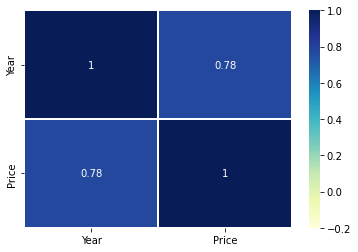

In [9]:
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=1,linewidth=0.3,cmap='YlGnBu');

# Linear Regression

In [10]:
y=data['Price']
x=data.drop(['Price'],axis=1)
print(x)
print(y)


     Year
0    2018
1    2019
2    2019
3    2018
4    2018
..    ...
107  2016
108  2014
109  2015
110  2016
111  2015

[112 rows x 1 columns]
0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64


In [11]:
# split the data for testing and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [13]:
# fit into linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [14]:
#train the model with training data
model=lr.fit(x_train,y_train)

In [15]:
#Do predictions for test data
y_pred=model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(y_test,y_pred))

MSE= 3962573261.894448


In [17]:
from sklearn.metrics import r2_score
print('r2 score=',r2_score(y_test,y_pred))

r2 score= 0.4887760028600123


### Prediction for the year 2022

In [19]:
y_for_prediction = {'Year': [2022]}
df=pd.DataFrame(y_for_prediction)
#print(df)
ynew=model.predict(df)
print(ynew)

[738670.65829848]


# Lasso Regression

In [20]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=1.0)
model2=lasso_reg.fit(x_train,y_train)

In [21]:
y_pred2=model2.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(y_test,y_pred2))

MSE= 3962570903.7258663


In [23]:
from sklearn.metrics import r2_score
print('r2 score=',r2_score(y_test,y_pred2))

r2 score= 0.48877630709473263


### Prediction for the year 2022

In [24]:
ydf = {'Year': [2022]}
df=pd.DataFrame(ydf)
#ydf
#print(df)
ynew=model2.predict(df)
print(ynew)

[738670.43917115]


In [ ]:
# Eventhough I tried different alpha values for Lasso Regression I got the same r2 score for both Linear 
#and Lasso Regression.So I cannot conclude which one is best with this dataset. 